# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_rides_df = pyber_data_df.groupby(['type'])['ride_id'].count()
city_rides_df.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
city_drivers_df = city_data_df.groupby(['type'])['driver_count'].sum()
city_drivers_df.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
city_totalfares_df = pyber_data_df.groupby(['type'])['fare'].sum()
city_totalfares_df.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
city_avgfares_df = pyber_data_df.groupby(['type'])['fare'].mean()
city_avgfares_df.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
city_fares_df = pyber_data_df.groupby(['type'])['fare'].median()
city_fares_df.head()

type
Rural       37.05
Suburban    30.75
Urban       24.64
Name: fare, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# city_rides_df = type, ride_id
# city_drivers_df = type, driver_count
# city_totalfares_df = type, fare
# city_avgfares_df = type, fare
# city_fares_df = type, fare

pyber_summary_df = pd.merge(city_rides_df, city_drivers_df, how="left", on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df, city_totalfares_df, how="left", on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df, city_avgfares_df, how="left", on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df, city_fares_df, how="left", on=['type'])

pyber_summary_df.rename(columns={
    'ride_id':'Total Rides',
    'driver_count':'Total Drivers',
    'fare_x':'Total Fares',
    'fare_y':'Average Fare per Ride',
    'fare':'Average Fare per Driver'
}, inplace=True)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,37.05
Suburban,625,490,19356.33,30.970128,30.75
Urban,1625,2405,39854.38,24.525772,24.64


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
import numpy as np
import scipy.stats as sts

# look up Map function in module

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

gb_df = pyber_data_df.groupby(['date', 'type'])
gbc_df = gb_df['fare'].sum()
gbc_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
gbc_df = gbc_df.reset_index()


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
gbc_pivot = gbc_df.pivot(index='date', columns='type', values='fare')
gbc_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01 000:08:16':'2019-04-29'.
gbc_jan_apr = gbc_pivot.loc['2019-01-01':'2019-04-29']
gbc_jan_apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
gbc_jan_apr.index = pd.to_datetime(gbc_jan_apr.index)


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
gbc_jan_apr.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN

[2196 rows x 3 columns]>

In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
gbc_jan_apr_df = gbc_jan_apr.resample('W').count()
gbc_jan_apr_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88
2019-02-10,4,31,94
2019-02-17,3,34,86
2019-02-24,11,43,103
2019-03-03,5,30,88


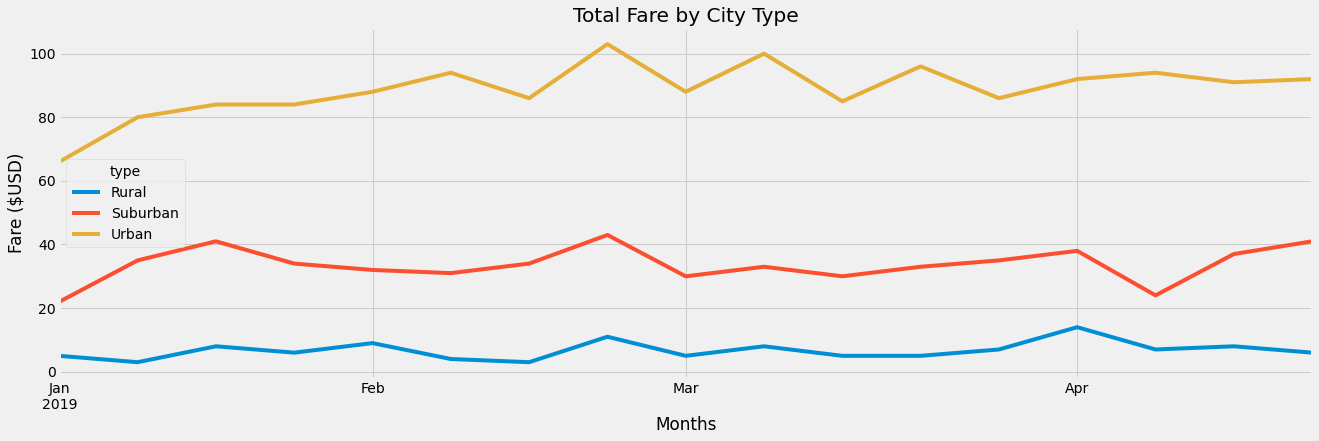

In [19]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#fix, ax = plt.subplots(figsize=(15,6))
#ax.plot(gbc_jan_apr_df, label = ["Rural","Suburban", "Urban"])
#ax.set_ylabel("Fare ($USD)")
#ax.grid(true)
       
#ax.legend()
#plt.show()

# Plot the resampled DataFrame.
gbc_jan_apr = gbc_jan_apr_df.plot(figsize = (20,6))

# Add a title
gbc_jan_apr.set_title("Total Fare by City Type")

# Add a x- and y-axis label.
gbc_jan_apr.set_xlabel("Months")
gbc_jan_apr.set_ylabel("Fare ($USD)")
plt.show()